In [7]:
!pip install gymnasium

In [8]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium.envs.classic_control.cartpole import CartPoleEnv

# Question 1

## Creating the GridWorldEnv class

In [24]:

class GridWorldEnv:
    def __init__(self, grid_size=5):
        self.grid_size = grid_size
        self.state_space = [(i, j) for i in range(grid_size) for j in range(grid_size)]
        self.action_space = ['U', 'D', 'L', 'R']
        self.current_state = (0, 0)
        self.goal = (4, 4)
        self.obstacles = [(2, 2), (3, 2)]
        self.water = (4,2)
        self.current_ep=0
        self.current_step = 0
        self.total_reward=0
        self.done=False

    def prob(self,s_f,a,s_i):

        (i,j) = s_i
        (x,y) = s_f

        if a  == "U":
            if(x == i + 1) and (y == j):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.8
            elif(x == i) and (y == j + 1):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.05
            elif(x == i) and (y == j - 1):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.05
            elif s_f == s_i:
                sum = 0
                if (self.prob((i+1,j),"U",s_i) == 0):
                    sum += 0.8
                if (self.prob((i,j+1),"U",s_i) == 0):
                    sum += 0.05
                if (self.prob((i,j-1),"U",s_i) == 0):
                    sum += 0.05
                return (0.1 + sum)
            else:
                return 0

        if a  == "D":
            if(x == i - 1) and (y == j):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.8
            elif(x == i) and (y == j + 1):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.05
            elif(x == i) and (y == j - 1):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.05
            elif s_f == s_i:
                sum = 0
                if (self.prob((i-1,j),"D",s_i) == 0):
                    sum += 0.8
                if (self.prob((i,j+1),"D",s_i) == 0):
                    sum += 0.05
                if (self.prob((i,j-1),"D",s_i) == 0):
                    sum += 0.05
                return (0.1 + sum)
            else:
                return 0

        if a  == "L":
            if(x == i) and (y == j - 1):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.8
            elif(x == i + 1) and (y == j):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.05
            elif(x == i - 1) and (y == j):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.05
            elif s_f == s_i:
                sum = 0
                if (self.prob((i,j-1),"L",s_i) == 0):
                    sum += 0.8
                if (self.prob((i+1,j),"L",s_i) == 0):
                    sum += 0.05
                if (self.prob((i-1,j),"L",s_i) == 0):
                    sum += 0.05
                return (0.1 + sum)
            else:
                return 0

        if a  == "R":
            if(x == i) and (y == j + 1):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.8
            elif(x == i + 1) and (y == j):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.05
            elif(x == i - 1) and (y == j):
                if (s_f not in self.state_space) or (s_f in self.obstacles):
                    return 0
                else:
                    return 0.05
            elif s_f == s_i:
                sum = 0
                if (self.prob((i,j+1),"R",s_i) == 0):
                    sum += 0.8
                if (self.prob((i+1,j),"R",s_i) == 0):
                    sum += 0.05
                if (self.prob((i-1,j),"R",s_i) == 0):
                    sum += 0.05
                return (0.1 + sum)
            else:
                return 0

    def reset_env(self):
        self.current_state = (0, 0)
        self.current_ep += 1
        self.current_step = 0
        self.done = False
        return

    def take_step(self,action):
        self.current_step += 1

        # Move probabilistically according to the action
        next_state = self.probabilistic_action(action)

        # Udate current state
        self.current_state = next_state

        # Define rewards
        if self.current_state == self.goal:
            reward = 10
            self.done = True
        elif self.current_state == self.water:
            reward = -10
            self.done = False
        else:
            reward = 0
            self.done = False

        return self.current_state, reward

    def probabilistic_action(self, action):
        (i,j) = self.current_state
        possible_final_states=[(i,j),(i+1,j),(i-1,j), (i,j-1),(i+1,j-1),(i-1,j-1), (i,j+1),(i+1,j+1),(i-1,j+1)]
        probabilities=[self.prob((x,y), action, self.current_state) for (x,y) in possible_final_states]

        selected_final_state = random.choices(possible_final_states, probabilities)[0]

        return (selected_final_state)

In [ ]:
    def update_till_eps(sigma, theta, prev_reward, environment):
        theta_new = np.random.normal(theta, sigma*np.ones((len(environment.state_space),len(environment.action_space))))
        new_reward = calculate_gains(sigma, theta_new, environment)
        improvement = new_reward - prev_reward
        if(abs(improvement) < 0.005):
                return (True, theta, prev_reward)
        elif(improvement > 0):
            print(f"new reward ={new_reward}, previous reward = {prev_reward} => improvement= {improvement}")
            return (False, theta_new, new_reward)
        else:
            return update_till_eps(sigma, theta, prev_reward, environment)

    def take_action(sigma, theta, environment):
        state = environment.current_state
        softmaxlist = [np.exp(sigma * theta[environment.state_space.index(state)][environment.action_space.index(action)])
                       for action in environment.action_space]
        probabilities = [i/sum(softmaxlist) for i in softmaxlist]
        action = random.choices(environment.action_space,probabilities)[0]
        return action

    def calculate_gains(sigma, theta_test, environment):
        average = 0
        for i in range(30):
            total_reward=0
            while environment.done == False :
                action = take_action(sigma, theta_test, environment)
                (state,reward) = environment.take_step(action)
                total_reward = reward + 0.9 * total_reward
            average += total_reward
            environment.reset_env()
        average = average / 30
        return average

    def optimal_policy(sigma, environment):
        converged = False
        theta = np.random.normal(0,1,(len(environment.state_space),len(environment.action_space)))
        reward = calculate_gains(sigma, theta, environment)
        while converged == False:
            try:
                converged, theta, reward = update_till_eps(sigma, theta, reward, environment)
            except(RecursionError):
                break
        return (reward, theta)

##Finding the best hyperparameter $\sigma$ among {0.5,0.75,0.875,0.9,1} based on the time taken.

In [ ]:
environment = GridWorldEnv()
total_time = 0
print(f"Sigma = {0.9}")
for i in range(30):
    sigma = 0.9
    print(f"Trial No. {i+1}, Time taken = {time_end - time_start}")
    time_start = time.time()
    temp_result = optimal_policy(sigma, environment)
    time_end = time.time()
    environment.reset_env()
    total_time += (time_end - time_start)

print(f"Average time taken= {total_time/30}")

Sigma = 0.9
Trial No. 1, Time taken = -0.0007331371307373047
new reward =4.890012973481003, previous reward = 4.053181429672553 => improvement= 0.8368315438084499
new reward =7.537868294729482, previous reward = 4.890012973481003 => improvement= 2.647855321248479
new reward =9.76708664003465, previous reward = 7.537868294729482 => improvement= 2.229218345305168
new reward =10.0, previous reward = 9.76708664003465 => improvement= 0.2329133599653499
Trial No. 2, Time taken = 2.3824684619903564
new reward =8.239382663311178, previous reward = 6.898105010580087 => improvement= 1.3412776527310903
new reward =9.999999127429115, previous reward = 8.239382663311178 => improvement= 1.7606164641179376
Trial No. 3, Time taken = 2.7790729999542236
new reward =4.8759260009749195, previous reward = 3.5629603070113425 => improvement= 1.312965693963577
new reward =6.6652077435939345, previous reward = 4.8759260009749195 => improvement= 1.789281742619015
new reward =9.997776152506429, previous reward =

In [ ]:
environment = GridWorldEnv()
total_time = 0
print(f"Sigma = {1}")
for i in range(30):
    sigma = 1
    print(f"Trial No. {i+1}, Time taken = {time_end - time_start}")
    time_start = time.time()
    temp_result = optimal_policy(sigma, environment)
    time_end = time.time()
    environment.reset_env()
    total_time += (time_end - time_start)

print(f"Average time taken= {total_time/30}")

Sigma = 1
Trial No. 1, Time taken = 2.276871919631958
new reward =5.871382933536046, previous reward = 1.2124912461831288 => improvement= 4.658891687352917
new reward =8.257406963460497, previous reward = 5.871382933536046 => improvement= 2.3860240299244504
new reward =8.59140163, previous reward = 8.257406963460497 => improvement= 0.33399466653950327
new reward =9.07147, previous reward = 8.59140163 => improvement= 0.4800683699999997
new reward =9.999999997779204, previous reward = 9.07147 => improvement= 0.9285299977792043
Trial No. 2, Time taken = 3.5742578506469727
new reward =5.678724968731436, previous reward = 4.644473588275521 => improvement= 1.034251380455915
new reward =9.229178634162656, previous reward = 5.678724968731436 => improvement= 3.5504536654312195
new reward =9.83259146555616, previous reward = 9.229178634162656 => improvement= 0.6034128313935039
new reward =9.999995058616697, previous reward = 9.83259146555616 => improvement= 0.16740359306053776
Trial No. 3, Time 

In [ ]:
environment = GridWorldEnv()
total_time = 0
print(f"Sigma = {0.5}")
for i in range(30):
    sigma = 0.5
    print(f"Trial No. {i+1}, Time taken = {time_end - time_start}")
    time_start = time.time()
    temp_result = optimal_policy(sigma, environment)
    time_end = time.time()
    environment.reset_env()
    total_time += (time_end - time_start)

print(f"Average time taken= {total_time/30}")

Sigma = 0.5
Trial No. 1, Time taken = 2.308750629425049
new reward =9.074301520026445, previous reward = 8.115260727227694 => improvement= 0.959040792798751
new reward =9.866688578274239, previous reward = 9.074301520026445 => improvement= 0.7923870582477939
new reward =9.989222020692322, previous reward = 9.866688578274239 => improvement= 0.12253344241808328
new reward =9.99452559891058, previous reward = 9.989222020692322 => improvement= 0.005303578218256888
new reward =9.999774474202614, previous reward = 9.99452559891058 => improvement= 0.005248875292034327
Trial No. 2, Time taken = 1.5807125568389893
new reward =9.551314984993981, previous reward = 5.1901267232406285 => improvement= 4.361188261753353
new reward =9.994149029418926, previous reward = 9.551314984993981 => improvement= 0.442834044424945
Trial No. 3, Time taken = 1.9624710083007812
new reward =5.893853575528774, previous reward = 3.3264022009206564 => improvement= 2.5674513746081176
new reward =9.460612127017951, previ

In [ ]:
environment = GridWorldEnv()
total_time = 0
print(f"Sigma = {0.75}")
for i in range(30):
    sigma = 0.75
    print(f"Trial No. {i+1}, Time taken = {time_end - time_start}")
    time_start = time.time()
    temp_result = optimal_policy(sigma, environment)
    time_end = time.time()
    environment.reset_env()
    total_time += (time_end - time_start)

print(f"Average time taken= {total_time/30}")

Sigma = 0.75
Trial No. 1, Time taken = 33.10255193710327
new reward =8.108961486324237, previous reward = 7.9017409881861225 => improvement= 0.20722049813811427
new reward =9.345523705270045, previous reward = 8.108961486324237 => improvement= 1.2365622189458083
new reward =9.371538112101023, previous reward = 9.345523705270045 => improvement= 0.026014406830977777
new reward =9.678984260974792, previous reward = 9.371538112101023 => improvement= 0.307446148873769
new reward =9.979839410608573, previous reward = 9.678984260974792 => improvement= 0.30085514963378124
Trial No. 2, Time taken = 5.891419172286987
new reward =8.607392233892323, previous reward = 7.578263881236724 => improvement= 1.029128352655599
new reward =9.011331938592829, previous reward = 8.607392233892323 => improvement= 0.40393970470050533
new reward =9.803168343322277, previous reward = 9.011331938592829 => improvement= 0.7918364047294482
new reward =9.967174303260546, previous reward = 9.803168343322277 => improveme

In [ ]:
environment = GridWorldEnv()
total_time = 0
print(f"Sigma = {0.875}")
for i in range(30):
    sigma = 0.875
    print(f"Trial No. {i+1}, Time taken = {time_end - time_start}")
    time_start = time.time()
    temp_result = optimal_policy(sigma, environment)
    time_end = time.time()
    environment.reset_env()
    total_time += (time_end - time_start)

print(f"Average time taken= {total_time/30}")

Sigma = 0.875
Trial No. 1, Time taken = 27.028188705444336
new reward =6.4414225136612915, previous reward = 4.078009330453962 => improvement= 2.3634131832073297
new reward =8.73663931121065, previous reward = 6.4414225136612915 => improvement= 2.295216797549359
new reward =9.977211235168605, previous reward = 8.73663931121065 => improvement= 1.2405719239579547
new reward =10.0, previous reward = 9.977211235168605 => improvement= 0.022788764831394914
Trial No. 2, Time taken = 1.829542875289917
new reward =7.115222187312402, previous reward = -5.035576953947234 => improvement= 12.150799141259636
new reward =8.445866651294413, previous reward = 7.115222187312402 => improvement= 1.3306444639820105
new reward =8.842305209811707, previous reward = 8.445866651294413 => improvement= 0.3964385585172945
new reward =9.11523151620806, previous reward = 8.842305209811707 => improvement= 0.2729263063963536
new reward =9.623612882068478, previous reward = 9.11523151620806 => improvement= 0.508381365

Based on these inspections, we choose $\sigma=0.75$

## Plotting the relevant curves

In [33]:
    def update_till_eps(sigma, theta, prev_reward, environment):
        theta_new = np.random.normal(theta, sigma*np.ones((len(environment.state_space),len(environment.action_space))))
        new_reward = calculate_gains(sigma, theta_new, environment)
        improvement = new_reward - prev_reward
        if(abs(improvement) < 0.005):
                return (True, theta, prev_reward)
        elif(improvement > 0):
            #print(f"new reward ={new_reward}, previous reward = {prev_reward} => improvement= {improvement}")
            return (False, theta_new, new_reward)
        else:
            return update_till_eps(sigma, theta, prev_reward, environment)

    def take_action(sigma, theta, environment):
        state = environment.current_state
        softmaxlist = [np.exp(sigma * theta[environment.state_space.index(state)][environment.action_space.index(action)])
                       for action in environment.action_space]
        probabilities = [i/sum(softmaxlist) for i in softmaxlist]
        action = random.choices(environment.action_space,probabilities)[0]
        return action

    def calculate_gains(sigma, theta_test, environment):
        average = 0
        for i in range(30):
            total_reward=0
            while environment.done == False :
                action = take_action(sigma, theta_test, environment)
                (state,reward) = environment.take_step(action)
                total_reward = reward + 0.9 * total_reward
            average += total_reward
            environment.reset_env()
        average = average / 30
        return average

    def optimal_policy(sigma, environment):
        converged = False
        theta = np.random.normal(0,1,(len(environment.state_space),len(environment.action_space)))
        reward = calculate_gains(sigma, theta, environment)
        gains = []
        gains.append(reward)
        while converged == False:
            try:
                converged, theta, reward = update_till_eps(sigma, theta, reward, environment)
                gains.append(reward)
            except(RecursionError):
                break
        return (reward, theta, gains)

In [27]:
env = GridWorldEnv()
trials = []

In [34]:
    temp_res = optimal_policy(0.75, env)
    for i,value in enumerate(temp_res[2]):
      if i < len(trials):
        trials[i] = ((trials[i][0] * trials[i][1] + value)/(trials[i][1] + 1) ,trials[i][1] + 1 )
      else:
        trials.append((value,1))


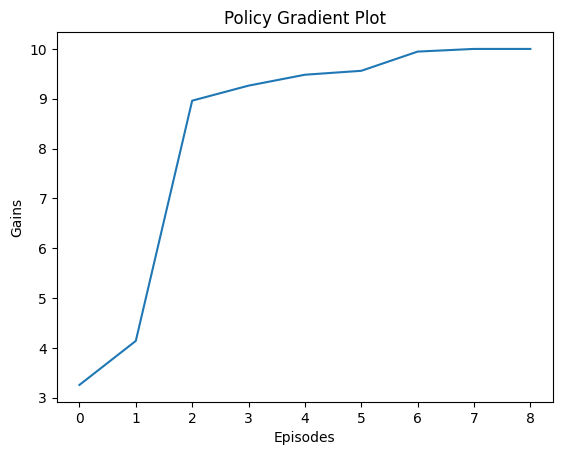

In [38]:
import matplotlib.pyplot as plt

plott= [x[0] for x in trials]
# Plotting the data
plt.plot(plott)

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Gains')
plt.title('Policy Gradient Plot')

# Display the plot
plt.show()

## Value Iteration method to find best policy:

In [ ]:
def update(V, environment):
    diff = np.inf
    history = []
    while(diff > 0.005):
      diff = 0
      for state_index,state in enumerate(environment.state_space):
        if state == environment.goal:
          continue
        max_ = 0
        v = V[state_index]
        for action in environment.action_space:
          temp = calculate_gains(environment, state, action)
          if temp > max_:
            max_ = temp
        V[state_index] = max_
        if state == (0,0):
          history.append(max_)
        diff = max(diff, abs(v - max_))
    return history

def calculate_gains(environment, state, action):
    return sum([environment.prob(s,action,state) * (reward(s, environment) + 0.9*V[i]) for i,s in enumerate(environment.state_space)])

def reward(sd, environment):
      if sd == environment.goal:
        return 10
      elif sd == environment.water:
        return -10
      else:
        return 0

def find_optimal_policy(V, environment):
    return update(V, environment)

def reset(V):
    V = [0 for i in range(self.no_states)]

In [ ]:
testenv = GridWorldEnv()
V = [0 for i in range(len(testenv.state_space))]

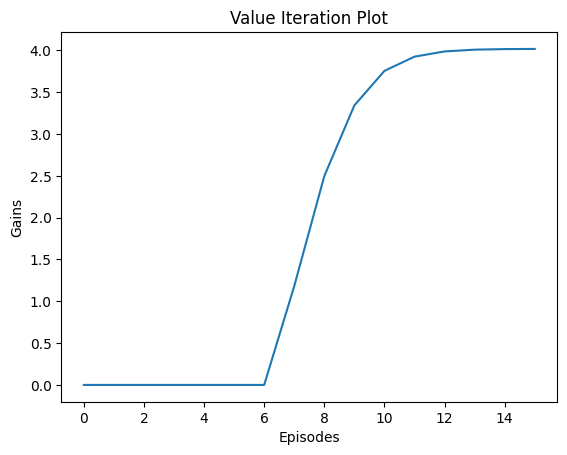

In [ ]:
value_iter_plot = find_optimal_policy(V, testenv)
# Plotting the data
plt.plot(value_iter_plot)

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Gains')
plt.title('Value Iteration Plot')

# Display the plot
plt.show()

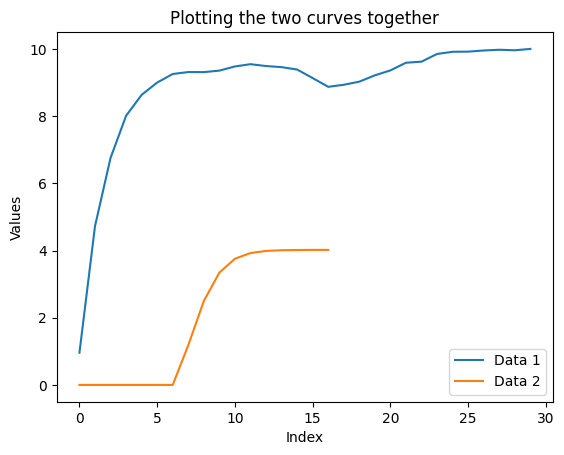

In [ ]:
# Plotting both sets of data on the same plot
plt.plot(policy_grad_plot, label='policy gradient method')
plt.plot(value_iter_plot, label='value iteration method')

# Adding labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plotting the two curves together')
plt.legend()

# Display the plot
plt.show()

We see that the value iteration algorithm converges faster than the policy ascent algorithm. Also the policy ascent algorithm takes way more time to execute.

# Question 2

## Importing the environment

In [3]:
from cartpole import ModifiedCartPoleEnvironment

## Policy gradient




In [4]:

# Define the policy function and parameterized gradient ascent update
def policy(state, params):
    # A simple linear policy
    return int(np.dot(state, params) > 0)

def update_params(params, learning_rate, current_reward, tolerance = 0.005):
    test_env = ModifiedCartPoleEnvironment()
    new_params = np.random.normal(params, learning_rate*np.ones(params.shape))
    _state = test_env.reset()
    total_reward = 0
    while True:
        action = policy(_state, new_params)
        next_state, reward, done, _ = test_env.step(action)

        total_reward += reward
        _state = next_state

        if done:
            improvement = total_reward - current_reward
            # print(f"{improvement}, {total_reward}, {current_reward}")
            if abs(improvement) < tolerance:
                test_env.close()
                return params, True, current_reward
            elif improvement > 0:
                return new_params, False, total_reward
            else:
                new_params = np.random.normal(params, learning_rate*np.ones(params.shape))
                test_env.close()
                _state = test_env.reset()
                total_reward = 0
                done = False

# Parameterized Gradient Ascent
def parameterized_gradient_ascent(env, num_episodes=1000, learning_rate=0.01):
    state_space_size = env.observation_space.shape[0] + 1
    action_space_size = env.action_space.n
    params = np.random.rand(state_space_size)  # Initialize parameters randomly

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        converged = False

        while True:
            action = policy(state, params)
            next_state, reward, done, _ = env.step(action)

            total_reward += reward
            state = next_state

            if done:
                break

        print(f"Episode {episode + 1}, Total Reward: {total_reward}")
        gain_history2.append(total_reward)
        if not converged:
            params, converged, _ = update_params(params, learning_rate, total_reward)

    return params

## Choosing hyperparameter
We choose the hyperparameter based on the number of episodes that converge to the optimal reward.

In [5]:
def parameterized_gradient_ascent_till_convergence(env, num_episodes=300, learning_rate=0.01):

    state_space_size = env.observation_space.shape[0] + 1
    action_space_size = env.action_space.n
    params = np.random.rand(state_space_size)  # Initialize parameters randomly
    converged = False

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0

        while True:
            try:
              action = policy(state, params)
            except ValueError:
              raise ValueError(len(state), len(params))
            next_state, reward, done, _ = env.step(action)

            total_reward += reward
            state = next_state

            if done:
                break

        # print(f"Episode {episode + 1}, Total Reward: {total_reward}")
        if not converged:
            params, converged,_ = update_params(params, learning_rate, total_reward)
        else:
            return (params,(episode+1), total_reward)
    return (params, -1, total_reward)

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=1)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 2, converged_reward = 12.0
Trial 2, episodes_till_convergence = 4, converged_reward = 97.0
Trial 3, episodes_till_convergence = 5, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 16, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 2, converged_reward = 9.0
Trial 6, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 7, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 8, episodes_till_convergence = 13, converged_reward = 1001.0
Trial 9, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 10, episodes_till_convergence = 2, converged_reward = 9.0
Trial 11, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 12, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 13, episodes_till_convergence = 3, converged_reward = 1001.0
Trial 14, episodes_till_convergence = 19, converged_reward = 1001.0
Trial 15, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 16, 

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=0.5)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 2, episodes_till_convergence = 4, converged_reward = 34.0
Trial 3, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 6, episodes_till_convergence = 2, converged_reward = 9.0
Trial 7, episodes_till_convergence = 13, converged_reward = 1001.0
Trial 8, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 9, episodes_till_convergence = 12, converged_reward = 1001.0
Trial 10, episodes_till_convergence = 2, converged_reward = 9.0
Trial 11, episodes_till_convergence = 2, converged_reward = 9.0
Trial 12, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 13, episodes_till_convergence = 3, converged_reward = 12.0
Trial 14, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 15, episodes_till_convergence = 2, converged_reward = 9.0
Trial 16, episodes

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=1.5)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 3, converged_reward = 1001.0
Trial 2, episodes_till_convergence = 6, converged_reward = 39.0
Trial 3, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 5, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 8, converged_reward = 659.0
Trial 6, episodes_till_convergence = 11, converged_reward = 1001.0
Trial 7, episodes_till_convergence = 5, converged_reward = 66.0
Trial 8, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 9, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 10, episodes_till_convergence = 4, converged_reward = 1001.0
Trial 11, episodes_till_convergence = 2, converged_reward = 9.0
Trial 12, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 13, episodes_till_convergence = 4, converged_reward = 1001.0
Trial 14, episodes_till_convergence = 3, converged_reward = 1001.0
Trial 15, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 16, e

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=2)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 2, converged_reward = 9.0
Trial 2, episodes_till_convergence = 2, converged_reward = 28.0
Trial 3, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 2, converged_reward = 9.0
Trial 5, episodes_till_convergence = 6, converged_reward = 136.0
Trial 6, episodes_till_convergence = 4, converged_reward = 1001.0
Trial 7, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 8, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 9, episodes_till_convergence = 3, converged_reward = 37.0
Trial 10, episodes_till_convergence = 5, converged_reward = 1001.0
Trial 11, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 12, episodes_till_convergence = 2, converged_reward = 9.0
Trial 13, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 14, episodes_till_convergence = 4, converged_reward = 80.0
Trial 15, episodes_till_convergence = 12, converged_reward = 1001.0
Trial 16, episode

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=0.25)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 25, converged_reward = 1001.0
Trial 2, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 3, episodes_till_convergence = 2, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 2, converged_reward = 9.0
Trial 6, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 7, episodes_till_convergence = 15, converged_reward = 1001.0
Trial 8, episodes_till_convergence = 2, converged_reward = 9.0
Trial 9, episodes_till_convergence = 2, converged_reward = 9.0
Trial 10, episodes_till_convergence = 2, converged_reward = 9.0
Trial 11, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 12, episodes_till_convergence = 2, converged_reward = 9.0
Trial 13, episodes_till_convergence = 4, converged_reward = 43.0
Trial 14, episodes_till_convergence = 2, converged_reward = 9.0
Trial 15, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 16, episodes_til

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=0.75)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 14, converged_reward = 1001.0
Trial 2, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 3, episodes_till_convergence = 4, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 12, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 6, episodes_till_convergence = 2, converged_reward = 9.0
Trial 7, episodes_till_convergence = 2, converged_reward = 20.0
Trial 8, episodes_till_convergence = 2, converged_reward = 9.0
Trial 9, episodes_till_convergence = 4, converged_reward = 1001.0
Trial 10, episodes_till_convergence = 11, converged_reward = 1001.0
Trial 11, episodes_till_convergence = 9, converged_reward = 45.0
Trial 12, episodes_till_convergence = 2, converged_reward = 9.0
Trial 13, episodes_till_convergence = 5, converged_reward = 33.0
Trial 14, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 15, episodes_till_convergence = 14, converged_reward = 1001.0
Trial 16, episo

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=0.1)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 2, converged_reward = 9.0
Trial 2, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 3, episodes_till_convergence = 2, converged_reward = 9.0
Trial 4, episodes_till_convergence = 14, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 18, converged_reward = 1001.0
Trial 6, episodes_till_convergence = 2, converged_reward = 9.0
Trial 7, episodes_till_convergence = 2, converged_reward = 18.0
Trial 8, episodes_till_convergence = 2, converged_reward = 1001.0
Trial 9, episodes_till_convergence = 18, converged_reward = 1001.0
Trial 10, episodes_till_convergence = 2, converged_reward = 14.0
Trial 11, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 12, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 13, episodes_till_convergence = 17, converged_reward = 1001.0
Trial 14, episodes_till_convergence = 2, converged_reward = 9.0
Trial 15, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 16, episod

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=1.25)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 2, converged_reward = 12.0
Trial 2, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 3, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 14, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 4, converged_reward = 37.0
Trial 6, episodes_till_convergence = 18, converged_reward = 1001.0
Trial 7, episodes_till_convergence = 16, converged_reward = 1001.0
Trial 8, episodes_till_convergence = 2, converged_reward = 9.0
Trial 9, episodes_till_convergence = 3, converged_reward = 191.0
Trial 10, episodes_till_convergence = 2, converged_reward = 9.0
Trial 11, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 12, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 13, episodes_till_convergence = 2, converged_reward = 9.0
Trial 14, episodes_till_convergence = 2, converged_reward = 9.0
Trial 15, episodes_till_convergence = 4, converged_reward = 1001.0
Trial 16, episodes

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=1.75)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 13, converged_reward = 1001.0
Trial 2, episodes_till_convergence = 11, converged_reward = 1001.0
Trial 3, episodes_till_convergence = 3, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 5, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 6, episodes_till_convergence = 2, converged_reward = 9.0
Trial 7, episodes_till_convergence = 4, converged_reward = 37.0
Trial 8, episodes_till_convergence = 12, converged_reward = 1001.0
Trial 9, episodes_till_convergence = 4, converged_reward = 37.0
Trial 10, episodes_till_convergence = 2, converged_reward = 9.0
Trial 11, episodes_till_convergence = 3, converged_reward = 12.0
Trial 12, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 13, episodes_till_convergence = 4, converged_reward = 44.0
Trial 14, episodes_till_convergence = 2, converged_reward = 9.0
Trial 15, episodes_till_convergence = 17, converged_reward = 1001.0
Trial 16, episod

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=1.1)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 2, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 3, episodes_till_convergence = 12, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 6, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 7, episodes_till_convergence = 9, converged_reward = 1001.0
Trial 8, episodes_till_convergence = 14, converged_reward = 1001.0
Trial 9, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 10, episodes_till_convergence = 8, converged_reward = 188.0
Trial 11, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 12, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 13, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 14, episodes_till_convergence = 13, converged_reward = 1001.0
Trial 15, episodes_till_convergence = 13, converged_reward = 1001

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=0.875)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 13, converged_reward = 1001.0
Trial 2, episodes_till_convergence = 2, converged_reward = 9.0
Trial 3, episodes_till_convergence = 12, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 2, converged_reward = 9.0
Trial 5, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 6, episodes_till_convergence = 12, converged_reward = 1001.0
Trial 7, episodes_till_convergence = 4, converged_reward = 32.0
Trial 8, episodes_till_convergence = 5, converged_reward = 42.0
Trial 9, episodes_till_convergence = 10, converged_reward = 1001.0
Trial 10, episodes_till_convergence = 6, converged_reward = 1001.0
Trial 11, episodes_till_convergence = 5, converged_reward = 1001.0
Trial 12, episodes_till_convergence = 2, converged_reward = 9.0
Trial 13, episodes_till_convergence = 17, converged_reward = 1001.0
Trial 14, episodes_till_convergence = 2, converged_reward = 9.0
Trial 15, episodes_till_convergence = 2, converged_reward = 9.0
Trial 16, episodes

In [ ]:
episode_count = 0
converged_count = 0
optimumreward_count = 0
num = 0
for i in range(30):
    environment = ModifiedCartPoleEnvironment(render_mode="rgb_array")
    environment.reset()

    (temp, this_count, this_reward) = parameterized_gradient_ascent_till_convergence(environment, learning_rate=0.9)

    if this_count > 0:
        converged_count += 1
    if this_reward == 1001:
        optimumreward_count +=1
    if this_count > 0 and this_reward == 1001:
        episode_count += this_count
        num += 1
    print(f"Trial {i + 1}, episodes_till_convergence = {this_count}, converged_reward = {this_reward}")

average_count = episode_count / num
print(f"Number of episodes that converged= {converged_count}, Average no. of episodes it took to converge = {average_count}, number of episodes converged to optimum reward={optimumreward_count}")

Trial 1, episodes_till_convergence = 2, converged_reward = 9.0
Trial 2, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 3, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 4, episodes_till_convergence = 5, converged_reward = 1001.0
Trial 5, episodes_till_convergence = 2, converged_reward = 9.0
Trial 6, episodes_till_convergence = 5, converged_reward = 1001.0
Trial 7, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 8, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 9, episodes_till_convergence = 2, converged_reward = 9.0
Trial 10, episodes_till_convergence = 7, converged_reward = 1001.0
Trial 11, episodes_till_convergence = 2, converged_reward = 9.0
Trial 12, episodes_till_convergence = 4, converged_reward = 51.0
Trial 13, episodes_till_convergence = 8, converged_reward = 1001.0
Trial 14, episodes_till_convergence = 11, converged_reward = 1001.0
Trial 15, episodes_till_convergence = 2, converged_reward = 9.0
Trial 16, episodes_t

Based on the above exploration, we can see that 1.1 appears to be a reasonable choice for the hyperparameter, learning rate.  

## Plotting the relevant curves

In [ ]:
def parameterized_gradient_ascent(env, num_episodes=1000, learning_rate=0.01):
    state_space_size = env.observation_space.shape[0] + 1
    action_space_size = env.action_space.n
    params = np.random.rand(state_space_size)  # Initialize parameters randomly

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        converged = False

        while True:
            action = policy(state, params)
            next_state, reward, done, _ = env.step(action)

            total_reward += reward
            state = next_state

            if done:
                break

        gain_history2.append(total_reward)
        if not converged:
            params, converged, _ = update_params(params, learning_rate, total_reward)

    return params

In [ ]:
gains= []
for i in range(300):
    gain_history2=[]
    environment = ModifiedCartPoleEnvironment()
    environment.reset()
    trained_params = parameterized_gradient_ascent(environment, num_episodes=30, learning_rate=1.1)
    environment.close()
    print(f"Trial number= {i + 1}")
    gains.append(gain_history2)

Trial number= 1
Trial number= 2
Trial number= 3
Trial number= 4
Trial number= 5
Trial number= 6
Trial number= 7
Trial number= 8
Trial number= 9
Trial number= 10
Trial number= 11
Trial number= 12
Trial number= 13
Trial number= 14
Trial number= 15
Trial number= 16
Trial number= 17
Trial number= 18
Trial number= 19
Trial number= 20
Trial number= 21
Trial number= 22
Trial number= 23
Trial number= 24
Trial number= 25
Trial number= 26
Trial number= 27
Trial number= 28
Trial number= 29
Trial number= 30
Trial number= 31
Trial number= 32
Trial number= 33
Trial number= 34
Trial number= 35
Trial number= 36
Trial number= 37
Trial number= 38
Trial number= 39
Trial number= 40
Trial number= 41
Trial number= 42
Trial number= 43
Trial number= 44
Trial number= 45
Trial number= 46
Trial number= 47
Trial number= 48
Trial number= 49
Trial number= 50
Trial number= 51
Trial number= 52
Trial number= 53
Trial number= 54
Trial number= 55
Trial number= 56
Trial number= 57
Trial number= 58
Trial number= 59
Trial 

In [ ]:
arr = np.array(gains)
column_means = np.mean(arr, axis = 0)
column_ste = np.std(arr, axis = 0)/ np.sqrt(30)

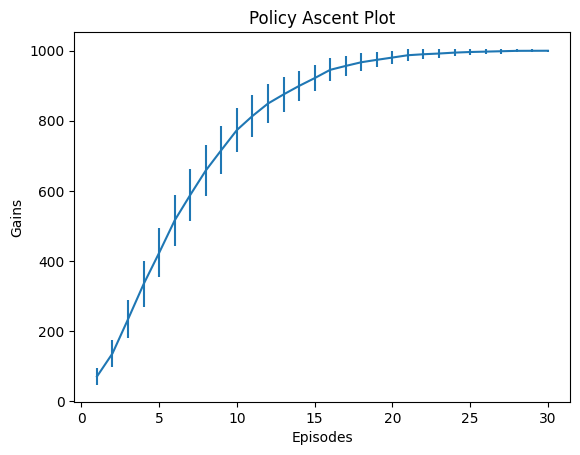

In [ ]:
# Plotting the data
plt.errorbar(x=np.array(range(1,31)),y=column_means,yerr=column_ste)

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Gains')
plt.title('Policy Ascent Plot')

# Display the plot
plt.show()

##Cross-entropy method

In [11]:
from crossentropy import CrossEntropy

In [18]:
all_gains= []
environment = ModifiedCartPoleEnvironment()
test_env = ModifiedCartPoleEnvironment()
implementor = CrossEntropy(environment, test_env, 10)
for i in range(300):
    implementor.parameterized_gradient_ascent(suppress_output=False)
    print(f"Trial number= {i + 1}")
    all_gains.append(implementor.gain_history)
    implementor.reset()

environment.close()
test_env.close()

Episode No. 1, Total Reward Obtained: 218.0, Converged = False
Episode No. 2, Total Reward Obtained: 223.0, Converged = False
Episode No. 3, Total Reward Obtained: 444.0, Converged = False
Episode No. 4, Total Reward Obtained: 852.0, Converged = False
Episode No. 5, Total Reward Obtained: 914.0, Converged = False
Episode No. 6, Total Reward Obtained: 935.0, Converged = False
Episode No. 7, Total Reward Obtained: 963.0, Converged = False
Episode No. 8, Total Reward Obtained: 1001.0, Converged = False
Episode No. 9, Total Reward Obtained: 1001.0, Converged = True
Episode No. 10, Total Reward Obtained: 1001.0, Converged = True
Trial number= 1
Episode No. 1, Total Reward Obtained: 9.0, Converged = False
Episode No. 2, Total Reward Obtained: 9.0, Converged = True
Episode No. 3, Total Reward Obtained: 9.0, Converged = True
Episode No. 4, Total Reward Obtained: 9.0, Converged = True
Episode No. 5, Total Reward Obtained: 9.0, Converged = True
Episode No. 6, Total Reward Obtained: 9.0, Converge

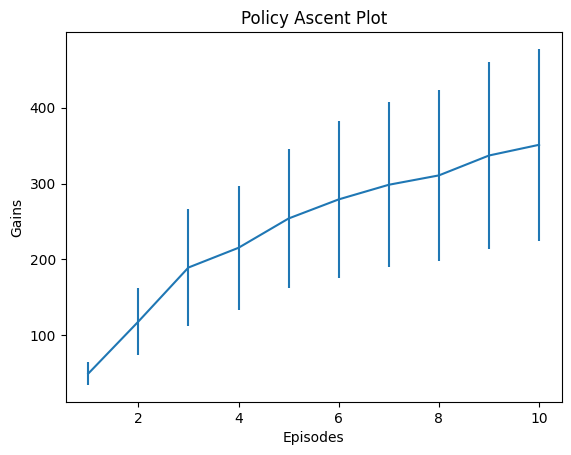

In [17]:
arr = np.array(all_gains)
column_means = np.mean(arr, axis = 0)
column_ste = np.std(arr, axis = 0)/ np.sqrt(10)

plt.errorbar(x=np.array(range(1,11)),y=column_means,yerr=column_ste)
# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Gains')
plt.title('Policy Ascent Plot')

# Display the plot
plt.show()
